Stock Price Prediction

**Aatiqa Attaullah**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

 1. Load the dataset

In [ ]:
df = pd.read_csv("NFLX.csv")
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)

In [ ]:
df.head()

,Open,High,Low,Close,Adj Close,Volume,Prediction
Date,,,,,,,
2018-02-05,262.000000,267.899994,250.029999,254.259995,254.259995,11896100,265.720001
2018-02-06,247.699997,266.700012,245.000000,265.720001,265.720001,12595800,264.559998
2018-02-07,266.579987,272.450012,264.329987,264.559998,264.559998,8981500,250.100006
2018-02-08,267.079987,267.619995,250.000000,250.100006,250.100006,9306700,249.470001
2018-02-09,253.850006,255.800003,236.110001,249.470001,249.470001,16906900,257.950012


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1008 entries, 2018-02-05 to 2022-02-03
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Open        1008 non-null   float64
 1   High        1008 non-null   float64
 2   Low         1008 non-null   float64
 3   Close       1008 non-null   float64
 4   Adj Close   1008 non-null   float64
 5   Volume      1008 non-null   int64  
 6   Prediction  1008 non-null   float64
dtypes: float64(6), int64(1)
memory usage: 63.0 KB


 2. Preprocessing

In [ ]:
# Create the target: Predict the 'Close' price of the NEXT day
df['Prediction'] = df['Close'].shift(-1)

In [ ]:
# Drop the last row (it has no target for the next day)
df.dropna(inplace=True)


In [ ]:
# Define features (X) and target (y)
features = ['Open', 'High', 'Low', 'Close', 'Volume']
X = df[features]
y = df['Prediction']

 3. Train-Test Split (Chronological)

In [ ]:
# Use first 80% for training, last 20% for testing
train_size = int(len(X) * 0.8)
X_train, X_test = X.iloc[:train_size], X.iloc[train_size:]
y_train, y_test = y.iloc[:train_size], y.iloc[train_size:]

4. Scaling

In [ ]:
scaler = MinMaxScaler()
# Fit on training data only to prevent data leakage
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

Model Training

In [ ]:
model = LinearRegression()
model.fit(X_train_scaled, y_train)

LinearRegression()

6. Evaluation

In [ ]:
predictions = model.predict(X_test_scaled)

rmse = np.sqrt(mean_squared_error(y_test, predictions))
r2 = r2_score(y_test, predictions)

print(f"RMSE: {rmse:.4f}")
print(f"R2 Score: {r2:.4f}")

RMSE: 13.1320
R2 Score: 0.9652


7. Visualization

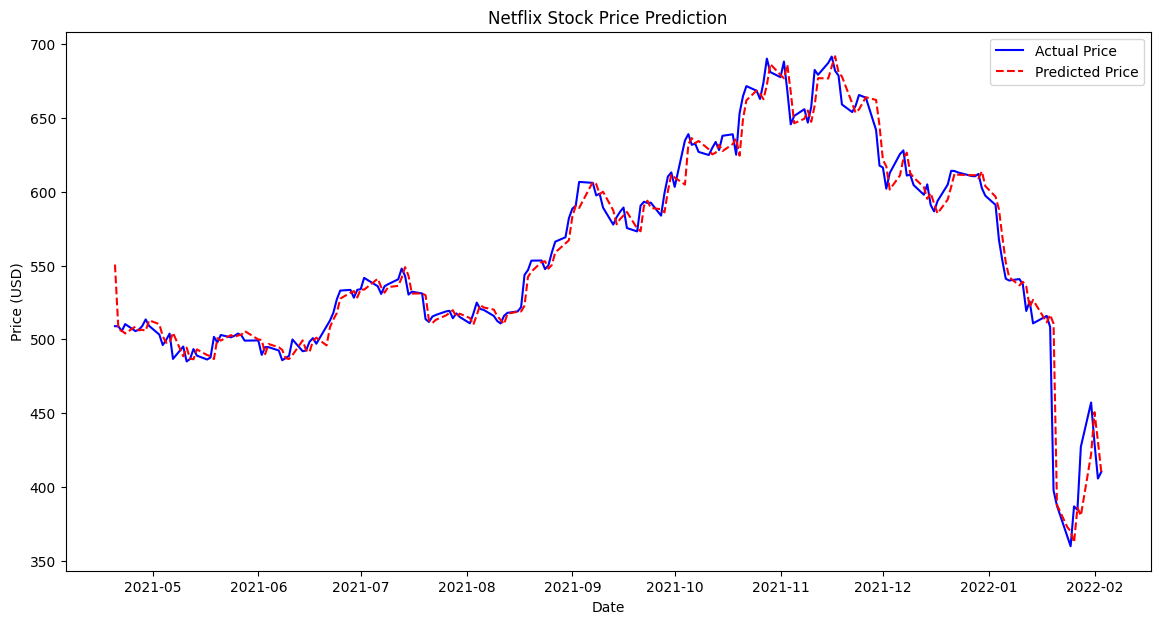

In [ ]:
plt.figure(figsize=(14, 7))
plt.plot(y_test.index, y_test.values, label='Actual Price', color='blue')
plt.plot(y_test.index, predictions, label='Predicted Price', color='red', linestyle='--')
plt.title('Netflix Stock Price Prediction')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.legend()
plt.show()